#**Drive Mount**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/Modern_Computer_Vision/
%cd /mydrive/Modern_Computer_Vision/

/
Mounted at /content/gdrive
 Brk					   'My Drive'
 Certifications				    Photos
 com_project				    Project-Proposal_P19.docx
'Deutsch Files'				    SampleSearchCache.ini
'EC Brighton'				    SEMRUK
'EE315 LAB'				    T
'EE400 Staj'				    tttech
 EK2_BScProjectPresentationFormat0218.ppt   Update_Report_2_P19.gdoc
 Final_Report_P19.docx			    Update_Report_3_P19.gdoc
 Infinity				    Update_Report_4_P19.gdoc
 IZTECH					    Update_Report_5_P19.gdoc
 Modern_Computer_Vision			    yolov4
/content/gdrive/My Drive/Modern_Computer_Vision


#**Library Import**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
# from segmentation import build_unet, vgg16_unet, vgg19_unet, resnet50_unet, inception_resnetv2_unet, densenet121_unet
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Dec 22 11:34:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


#**GPU Check**

In [ ]:
!nvidia-smi -L

GPU 0: A100-SXM4-40GB (UUID: GPU-a420e8b1-f936-cc04-8cc8-03e13208adf6)


In [ ]:
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


#**CPU - GPU Usage Check**

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14022826077202715883
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16075981083257749856
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#**Ram Check**

In [ ]:
!cat /proc/meminfo

#**Data Gathering**

Arrange according to your directory use only one of them

In [ ]:
base_directory = './NEW_100_5100dataset/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

In [ ]:
base_directory = './NEW_3000data_5100dataset/3000_5100dataset_newmasks/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

In [ ]:
base_directory = './5100data_w_new_mask/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './low_quality_data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './High_Quality_Data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './High_Quality_Data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'mask_reshape')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './data/Forest_Segmented/Forest_Segmented/'
images_folder = os.path.join(base_directory, 'images_old')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './data_v2/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
data.describe()

images               masks
count                 664                 664
unique                664                 664
top     838669_sat_47.jpg  0_masked_image.jpg
freq                    1                   1

In [ ]:
data.head()

images               masks
0  838669_sat_47.jpg  0_masked_image.jpg
1  838669_sat_54.jpg  1_masked_image.jpg
2  838669_sat_55.jpg  2_masked_image.jpg
3  838669_sat_56.jpg  3_masked_image.jpg
4  838669_sat_64.jpg  4_masked_image.jpg

In [ ]:
SIZE = 256

In [ ]:
def input_target_split(data,images_folder,masks_folder,dim):
    dataset = []
    for index, row in data.iterrows():
        image = load_img(os.path.join(images_folder, row['images']), target_size=(dim,dim))
        mask = load_img(os.path.join(masks_folder, row['masks']), target_size=(dim,dim), color_mode='grayscale')
        image = img_to_array(image)
        image = image/255.0
        mask = img_to_array(mask)
        mask = mask/255.0
        dataset.append((image,mask))
        print(f"\rProgress: {index}",end='')
    random.shuffle(dataset)
    X, Y = zip(*dataset)

    return np.array(X),np.array(Y)

In [ ]:
img_dim = 256
X, Y = input_target_split(data,images_folder,masks_folder,img_dim)

Progress: 663

In [ ]:
print("Image Dimensions: ",X.shape)
print("Mask Dimensions: ",Y.shape)

Image Dimensions:  (101, 256, 256, 3)
Mask Dimensions:  (101, 256, 256, 1)


In [ ]:
split_1 = round(X.shape[0]*0.70)
split_2 = round(X.shape[0]*0.90)
X_train = X[:split_1]
Y_train = Y[:split_1]
X_val = X[split_1:split_2]
Y_val = Y[split_1:split_2]
X_test = X[split_2:]
Y_test = Y[split_2:]

In [ ]:
datagen = ImageDataGenerator()
valgen = ImageDataGenerator()
testgen = ImageDataGenerator()

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)
testgen.fit(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 0)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256, 3)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(Y_train[image_number], (256, 256)), cmap='gray')
plt.show()


In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
#Parameters for model


num_labels = 1  #Binary
#input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
input_shape = (256,256,3)

batch_size = 8


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

In [ ]:
def conv_block(x, filter_size, size, dropout, batch_norm=False):

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn


In [ ]:
def Attention_UNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):
    '''
    Attention UNet,

    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters

    inputs = layers.Input(input_shape, dtype=tf.float32)

    # Downsampling layers
    # DownRes 1, convolution + pooling
    conv_128 = conv_block(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 2
    conv_64 = conv_block(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 3
    conv_32 = conv_block(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # DownRes 4
    conv_16 = conv_block(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
    # DownRes 5, convolution only
    conv_8 = conv_block(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
    att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
    up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
    up_16 = layers.concatenate([up_16, att_16], axis=3)
    up_conv_16 = conv_block(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 7
    gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
    att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
    up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
    up_32 = layers.concatenate([up_32, att_32], axis=3)
    up_conv_32 = conv_block(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 8
    gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=3)
    up_conv_64 = conv_block(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
    # UpRes 9
    gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=3)
    up_conv_128 = conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    # 1*1 convolutional layers
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_128)
    conv_final = layers.BatchNormalization(axis=3)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="Attention_UNet")
    return model

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def iou_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def iou_coef_loss(y_true, y_pred):
    return -iou_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
#start2 = datetime.datetime.now()
#stop2 = datetime.datetime.now()
#Execution time of the model
#execution_time_Att_Unet = stop2-start2
#print("Attention UNet execution time is: ", execution_time_Att_Unet)

In [ ]:
from keras.optimizers import Adam
import datetime

att_unet_model = Attention_UNet(input_shape)

#att_unet_model.compile(optimizer=Adam(lr = 1e-3), loss=['binary_crossentropy'], metrics=['accuracy', iou_coef])
att_unet_model.compile(optimizer=Adam(lr = 1e-3), loss=dice_coef_loss, metrics=['accuracy', iou_coef])

print(att_unet_model.summary())


Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 256, 256, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_27 (BatchN  (None, 256, 256, 64  256        ['conv2d_39[0][0]']              
 ormalization)                  )                                                    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 activation_45 (Activation)     (None, 32, 32, 512)  0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 32, 32, 256)  131328      ['activation_45[0][0]']          
                                                                                                  
 batch_normalization_41 (BatchN  (None, 32, 32, 256)  1024       ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_46 (Activation)     (None, 32, 32, 256)  0           ['batch_normalization_41[0][0]'] 
                                                                                                  
 conv2d_58 (Conv2D)             (None, 32, 32, 256)  65792       ['activation_46[0][0]']          
          

In [ ]:
from keras.optimizers import Adam
import datetime

att_unet_model = Attention_UNet(input_shape)

#att_unet_model.compile(optimizer=Adam(lr = 1e-3), loss=['binary_crossentropy'], metrics=['accuracy', iou_coef])
att_unet_model.compile(optimizer=Adam(lr = 1e-3), loss=dice_coef_loss, metrics=['accuracy', iou_coef])

print(att_unet_model.summary())

att_unet_history = att_unet_model.fit(X_train, Y_train,
                    verbose=1,
                    batch_size = batch_size,
                    validation_data=(X_val, Y_val),
                    shuffle=False,
                    epochs=50)
att_unet_model.save('Attention_UNet_50epochs.hdf5')

Model: "Attention_UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                  'activation_7[0][0]']           
                                                                                                  
 conv2d_14 (Conv2D)             (None, 32, 32, 512)  262656      ['multiply[0][0]']               
                                                                                                  
 up_sampling2d_1 (UpSampling2D)  (None, 32, 32, 1024  0          ['activation_9[0][0]']           
                                )                                                                 
                                                                                                  
 batch_normalization_11 (BatchN  (None, 32, 32, 512)  2048       ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 concatena

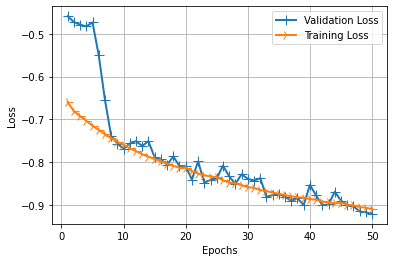

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = att_unet_history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

#plt.ylim(0, 3)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

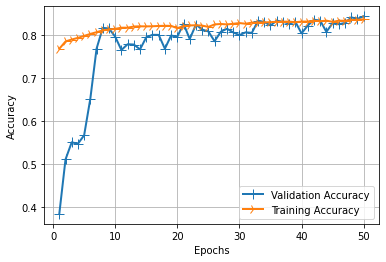

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = att_unet_history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

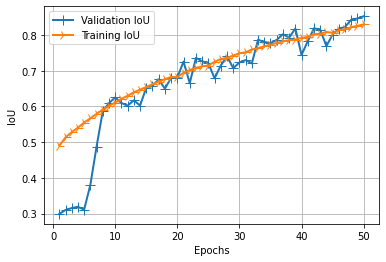

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = att_unet_history.history

# Extract the loss and validation losses
loss_values = history_dict['iou_coef']
val_loss_values = history_dict['val_iou_coef']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation IoU')
line2 = plt.plot(epochs, loss_values, label='Training IoU')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
att_unet_model.save("Attention_U-Net_Model.h5")
print("Model Saved")

In [ ]:
att_unet_model.save_weights("Attention_U-Net_Model.h5")

In [ ]:
att_unet_model.load_weights("Attention_U-Net_Model.h5")

In [ ]:
att_unet_model.save("Attention_U-Net_Model.hdf5")
print("Model Saved")

In [ ]:
att_unet_model.save_weights("Attention_U-Net_Model.hdf5")

In [ ]:
att_unet_model.save_weights("Attention_U-Net_Model.hdf5")

3/3 [==============================] - 4s 387ms/step


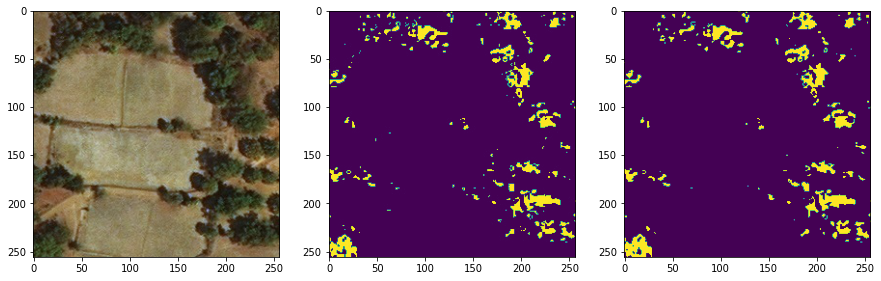

In [ ]:
plt.figure(figsize = (15 , 9))
result = att_unet_model.predict(X_test)
output = result[0]
output[output >= 0.5] = 1
output[output < 0.5] = 0

plt.subplot(1, 3, 1)
plt.imshow(X_test[0])

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(Y_test[0]))

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(output))

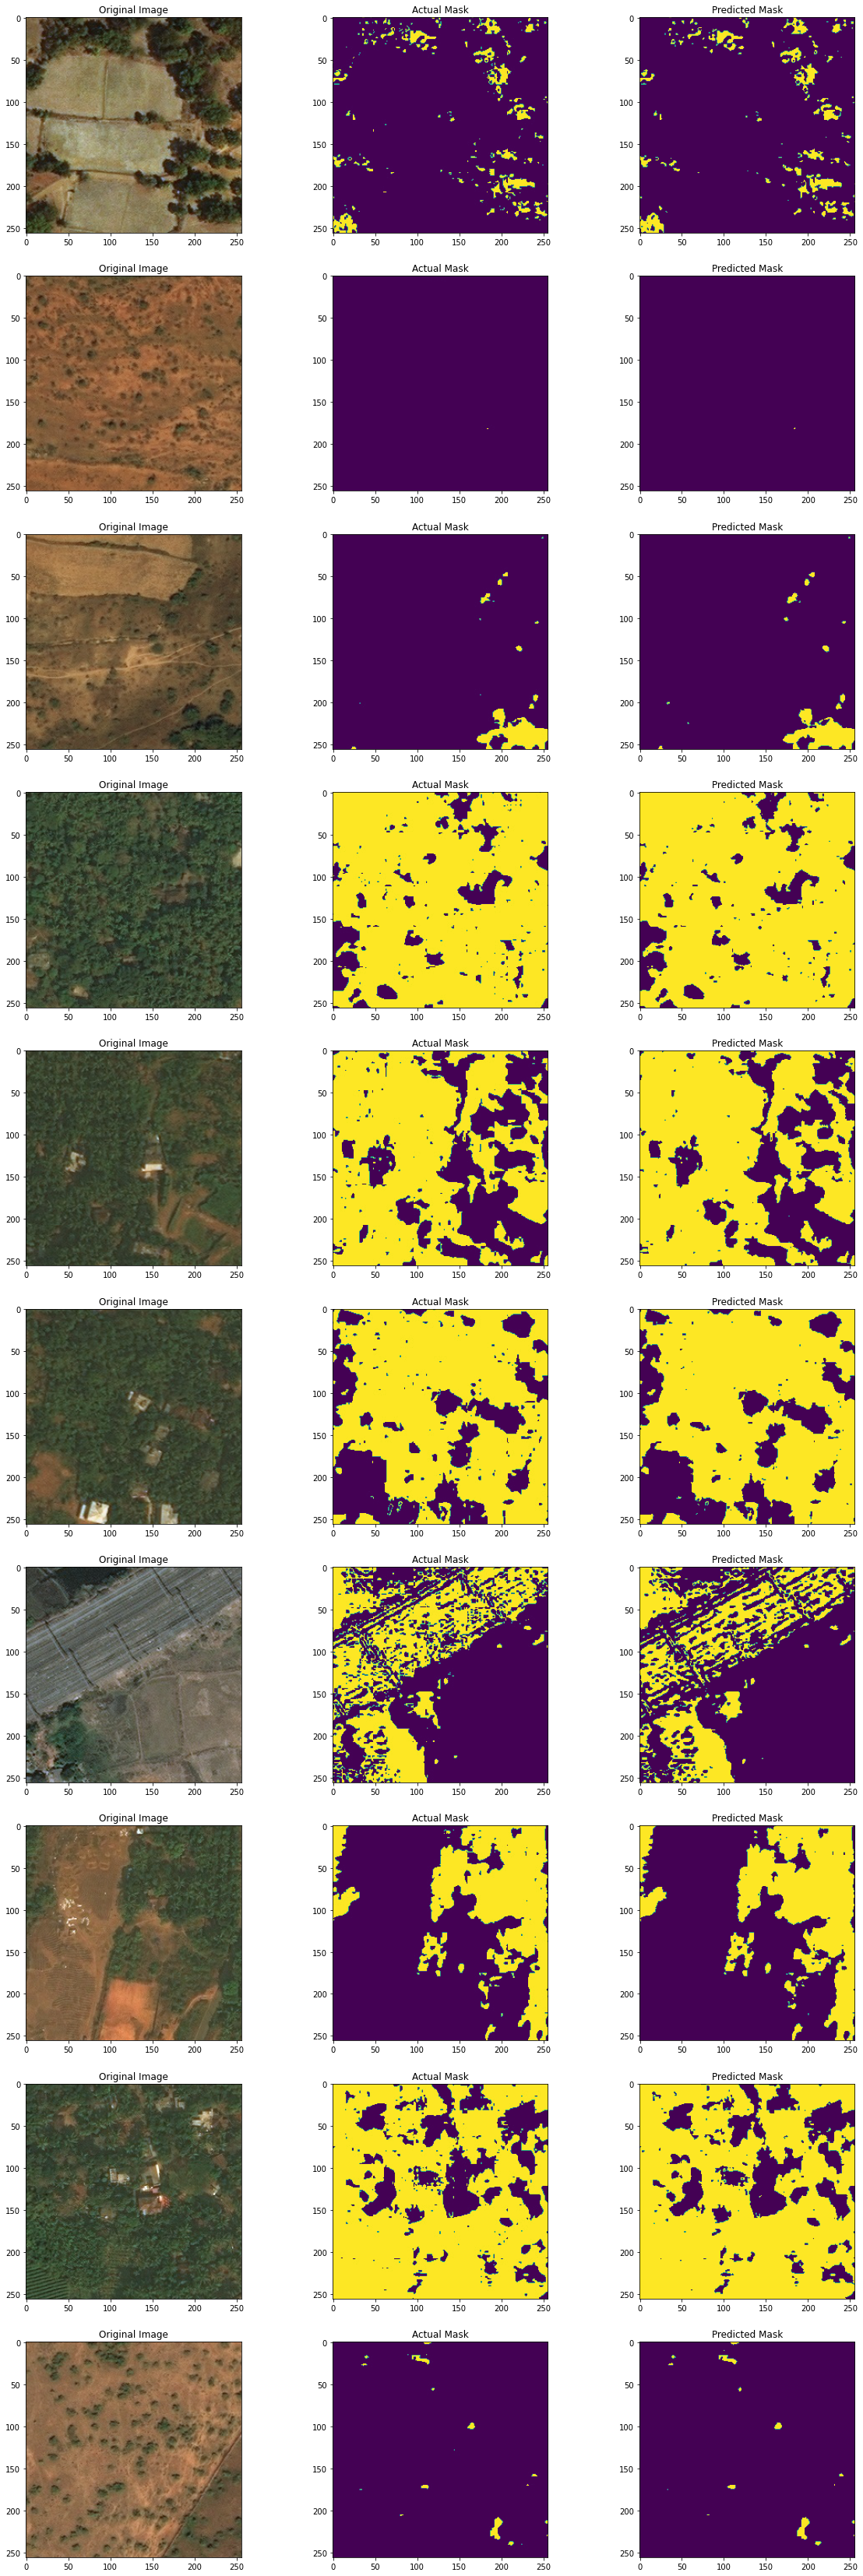

In [ ]:
f, axarr = plt.subplots(10,3,figsize=(20, 60))

for i in range(0,10):
    output = result[i]
    output[output >= 0.5] = 1
    output[output < 0.5] = 0

    axarr[i,0].imshow(X_test[i])
    axarr[i,0].title.set_text('Original Image')
    axarr[i,1].imshow(np.squeeze(Y_test[i]))
    axarr[i,1].title.set_text('Actual Mask')
    axarr[i,2].imshow(np.squeeze(output))
    axarr[i,2].title.set_text('Predicted Mask')

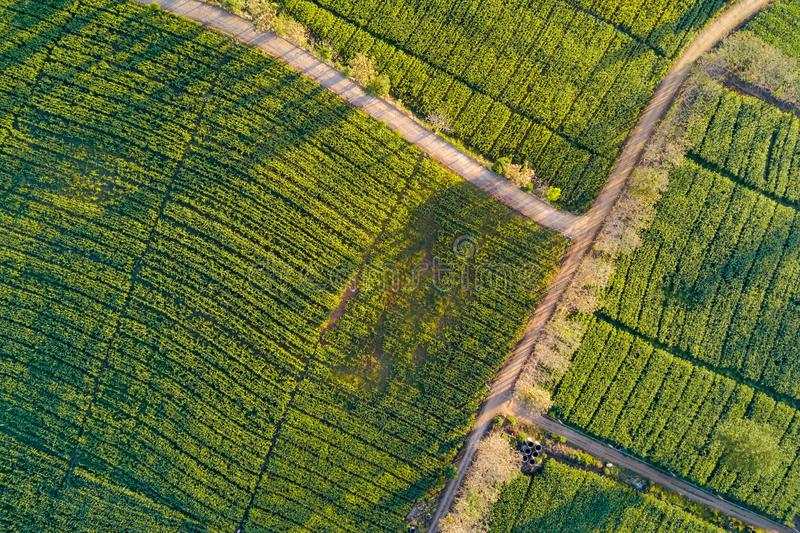

In [ ]:
from google.colab.patches import cv2_imshow
out = cv2.imread("aerial-view-rural-road-green-corn-field-beautiful-abstract-geometric-shapes-agricultural-parcels-lush-landscape-countryside-137194914.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(out)